## 12 terminals systems

The center and the leads are MTI(Δ≠0).

We primarily use this model to calcualate the difference between the top and bottom surfaces`s σ. 


In [46]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

I_4= tinyarray.array(np.kron(sigma_0, sigma_0))
gamma_1 = tinyarray.array(np.kron(sigma_0, sigma_z))
gamma_2 = tinyarray.array(np.kron(sigma_z, sigma_z))
gamma_3 = tinyarray.array(np.kron(sigma_0, sigma_y))
gamma_4 = tinyarray.array(np.kron(sigma_0, sigma_x))

B=-300
g=300
D=0
las=1

structure=kwant.lattice.square(las, norbs=4)
model_sym= kwant.TranslationalSymmetry(structure.vec((-1,0)),structure.vec((0,-1)))


def onsite(site,m):
    return m/2*gamma_1 - (4*B)/las**2 * gamma_2 + D * gamma_2

hopping_x = B/(las**2)*gamma_2 + 1j*g/(2*las)*gamma_3
hopping_y = B/(las**2)*gamma_2 - 1j*g/(2*las)*gamma_4

def model_MTI():
    model_1= kwant.Builder(model_sym)

    model_1[structure(0, 0)] = onsite
    model_1[kwant.builder.HoppingKind((1,0), structure)]  = hopping_x
    model_1[kwant.builder.HoppingKind((0,1), structure)]  = hopping_y

    return model_1

def model_EG():

    onsite_leads= 150 *I_4
    hopping_leads= -150 *I_4

    model_2= kwant.Builder(model_sym)
    model_2[structure(0, 0)] = onsite_leads
    model_2[structure.neighbors()]  = hopping_leads

    return model_2

def make_syst(width=50,length=550,leads_model=model_EG()):
    
    ########### create the scattering center

    def shape_center(site):
        x, y = site.pos
        return 0 < x <= length and 0 < y <= width

    syst= kwant.Builder()
    syst.fill(model_MTI(), shape_center,(1,1))

    ########### create the leads

    width_lead = length//11

    lead0= kwant.Builder(kwant.TranslationalSymmetry((-1,0)))
    lead1= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    lead2= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    lead3= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    lead4= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    lead5= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    
    def shape_lead0(site):
        x, y = site.pos
        return 0 < y <= width

    def shape_lead1(site):
        x, y = site.pos
        return width_lead < x <= 2*width_lead

    def shape_lead2(site):
        x, y = site.pos
        return 3*width_lead < x <= 4*width_lead
    
    def shape_lead3(site):
        x, y = site.pos
        return 5*width_lead < x <= 6*width_lead
    
    def shape_lead4(site):
        x, y = site.pos
        return 7*width_lead < x <= 8*width_lead
    
    def shape_lead5(site):
        x, y = site.pos
        return 9*width_lead < x <= 10*width_lead

    lead0.fill(leads_model, shape_lead0, (0, 1))
    lead1.fill(leads_model, shape_lead1, (width_lead+1, 0))
    lead2.fill(leads_model, shape_lead2, (3*width_lead+1, 0))
    lead3.fill(leads_model, shape_lead3, (5*width_lead+1, 0))
    lead4.fill(leads_model, shape_lead4, (7*width_lead+1, 0))
    lead5.fill(leads_model, shape_lead5, (9*width_lead+1, 0))

    ########### create the six-terminal device
    for lead in [lead0,lead1,lead2,lead3,lead4,lead5, lead0.reversed(),lead5.reversed(),lead4.reversed(),lead3.reversed(),lead2.reversed(),lead1.reversed()]:
        syst.attach_lead(lead)

    return syst.finalized()




/Users/richard/miniforge3/envs/xxy/lib/python3.14/site-packages/kwant/_plotter.py:77: RuntimeWarning: plotly is not available, if other engines are unavailable, only iterator-providing functions will work
  warnings.warn("plotly is not available, if other engines are unavailable,"


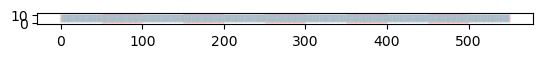

In [2]:
syst_1=make_syst(width=10,leads_model=model_MTI())
kwant.plot(syst_1) ;

## Band structure

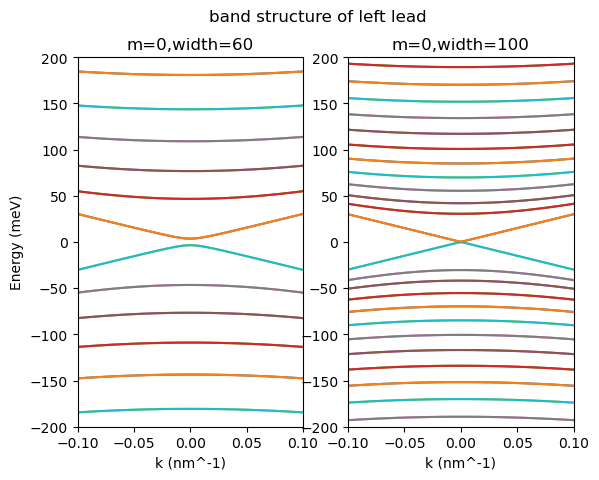

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('band structure of left lead')

x_lim=0.1
y_lim=20
ax1.set_ylabel('Energy (meV)')
ax1.set_title('m=0,width=60')
ax2.set_title('m=0,width=100')
for ax in (ax1,ax2):
    ax.set_xlabel('k (nm^-1)')
    ax.set_ylim(-y_lim,y_lim)
    ax.set_xlim(-x_lim,x_lim)

syst1=make_syst(width=30, length=660, leads_model=model_MTI()).leads[0]
syst2=make_syst(width=60,length=660, leads_model=model_MTI()).leads[0]

kwant.plotter.bands(syst1,momenta=np.linspace(-x_lim, x_lim, 100), ax=ax1, params=dict(m=0));
kwant.plotter.bands(syst2,momenta=np.linspace(-x_lim, x_lim, 100), ax=ax2, params=dict(m=0));

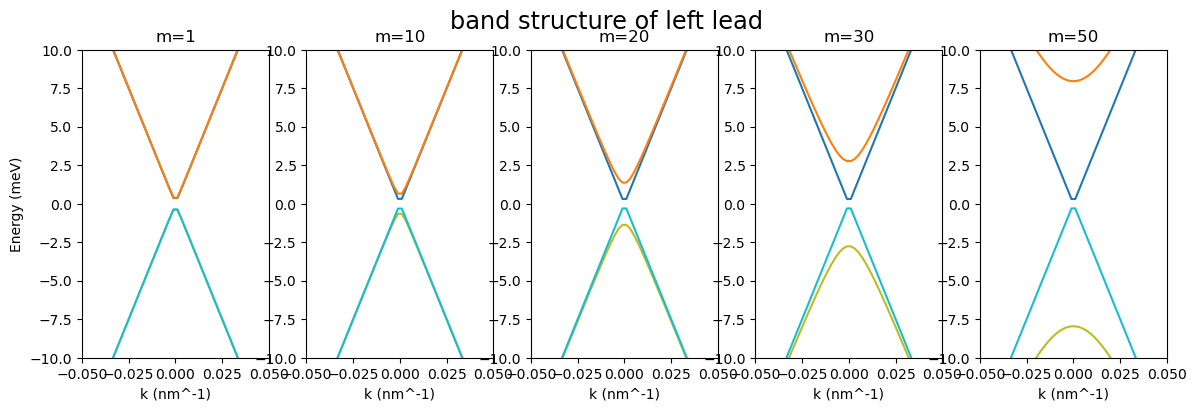

In [9]:
syst1=make_syst(width=60,length=660,leads_model=model_MTI()).leads[0]

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(14, 4))
fig.suptitle('band structure of left lead', size='xx-large')
y_limit = 10
x_limit = 0.05
ax1.set_ylabel('Energy (meV)')
for ax in zip((ax1,ax2,ax3,ax4,ax5),(1,10,20,30,50)):
    ax[0].set_xlabel('k (nm^-1)')
    ax[0].set_ylim(-y_limit,y_limit)
    ax[0].set_xlim(-x_limit,x_limit)
    ax[0].set_title(f'm={ax[1]}')
    kwant.plotter.bands(syst1,momenta=np.linspace(-x_limit,x_limit , 50), ax=ax[0], params=dict(m=ax[1]));


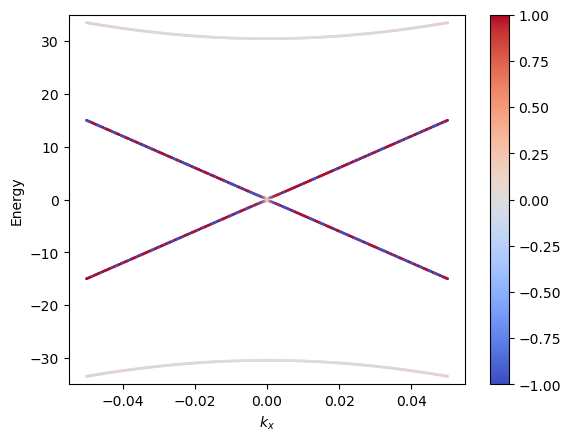

In [5]:
syst1=make_syst(width=60,length=330,leads_model=model_MTI()).leads[0]

bands = kwant.physics.Bands(syst1, params=dict(m=0))
momenta=np.linspace(-0.05, 0.05, 200)

es=[]
evs=[]
for k in momenta:
    tem_a,tem_b= bands(k=k,return_eigenvectors = True) 
    es.append(tem_a)
    evs.append(tem_b)

zcolors=[]
for k in range(len(momenta)):
    tem_1=[]
    for i in range(np.array(es).shape[1]):
            swf=np.reshape(np.abs(evs[k][:,i])**2,(-1,2)).sum(1)
            tem_c=swf.reshape(2,-1).sum(1)
            tem_1.append(tem_c[0]-tem_c[1])
    zcolors.append(tem_1)    

for i in range(np.array(es).shape[1]):
    plt.scatter(momenta,np.array(es)[:,i],s=1,c=np.array(zcolors)[:,i],cmap="coolwarm",vmin=-1.,vmax=1.)
plt.ylim(-35,35)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.colorbar();

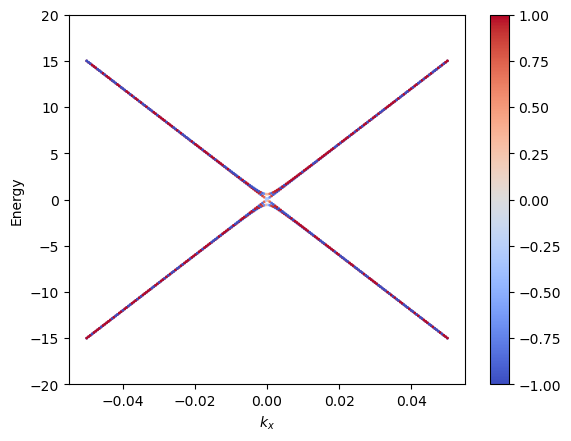

In [6]:
syst=make_syst(width=60,length=330,leads_model=model_MTI()).leads[0]

bands = kwant.physics.Bands(syst, params=dict(m=10))
momenta=np.linspace(-0.05, 0.05, 200)

es=[]
evs=[]
for k in momenta:
    tem_a,tem_b= bands(k=k,return_eigenvectors = True) 
    es.append(tem_a)
    evs.append(tem_b)

for i in range(np.array(es).shape[1]):
    plt.scatter(momenta,np.array(es)[:,i],s=1,c=np.array(zcolors)[:,i],cmap="coolwarm",vmin=-1.,vmax=1.)
plt.ylim(-20,20)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.colorbar();

## Density of current

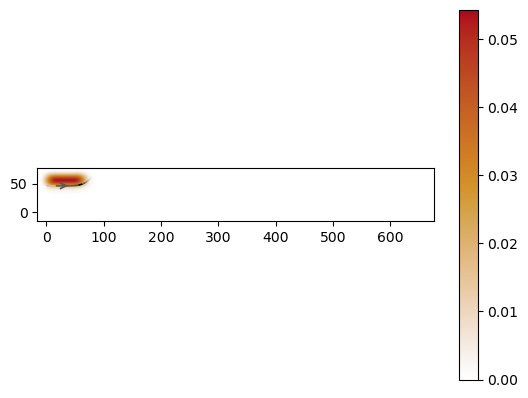

In [10]:
fsyst = make_syst(width=60,length=660,leads_model=model_MTI())

J=kwant.operator.Current(fsyst)            #这个对象是一个电流算符，可以用来计算系统 fsyst 中任意两个相邻格点（跳跃，hopping）之间的局部电流密度。wf[0][0] 通常表示从第一个引线注入的波函数在第一个自旋/轨道通道中的分量（具体取决于模型的自由度）。
wf=kwant.wave_function(fsyst, energy=8,params=dict(m=20))  #它是一个包含了已计算好的散射波函数集合的对象。
psi=wf(0)[0]                               #为什么只有一个一个轨道模型
current = J(psi)
kwant.plotter.current(fsyst, current, colorbar=True, show=True)

## Distribution of wavefuncion

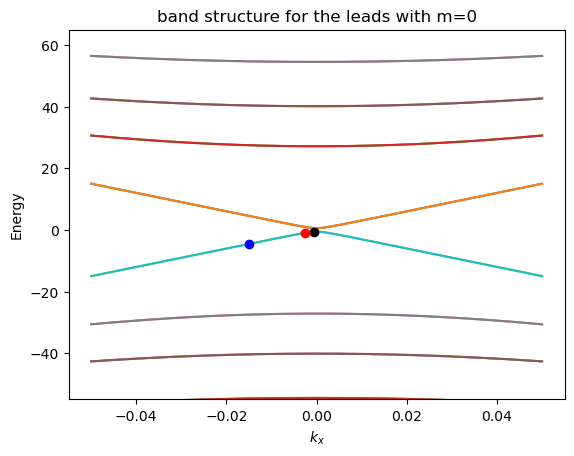

In [4]:
syst1=make_syst(width=60,length=660,leads_model=model_MTI()).leads[0]

bands = kwant.physics.Bands(syst1, params=dict(m=0))
momenta=np.linspace(-0.05, 0.05, 201)

es=[]
evs=[]
for k in momenta:
    tem_a,tem_b= bands(k=k,return_eigenvectors = True) 
    es.append(tem_a)
    evs.append(tem_b)

# the 100th, 96th and 70th states (k values) are chosen, the 120th energy level (band) is chosen
plt.plot(momenta,es);
plt.plot(momenta[99], es[99][118], 'ko')
plt.plot(momenta[95], es[95][119], 'ro')
plt.plot(momenta[70], es[70][119], 'bo')
plt.ylim(-55,65)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.title('band structure for the leads with m=0');

Text(0, 0.5, 'possibility of the wavefunction')

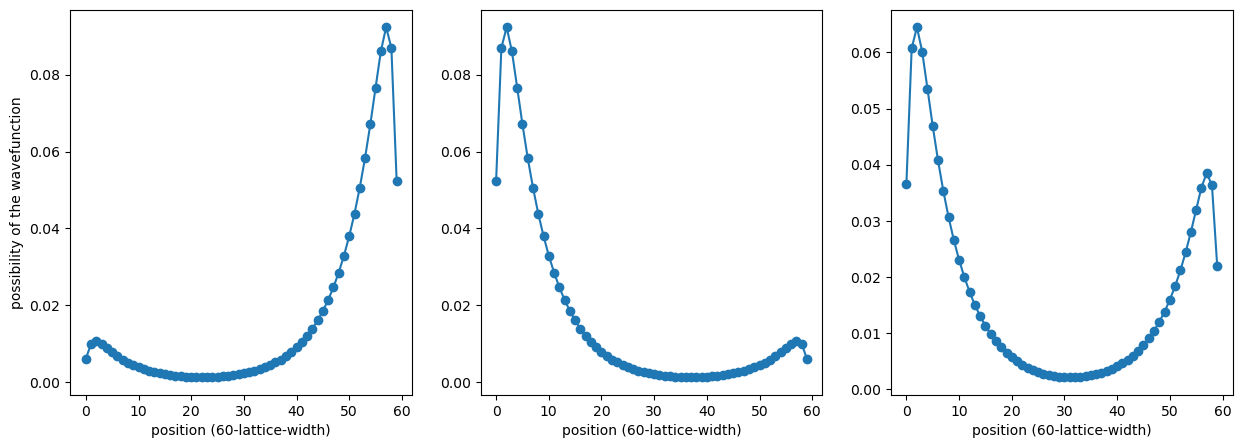

In [5]:
swf1=np.abs(evs[95][:,118])**2
swf2=np.abs(evs[95][:,119])**2
swf3=np.abs(evs[99][:,119])**2
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(15,5))
ax1.plot(range(60),swf1.reshape((-1,4)).sum(1),'-o')
ax2.plot(range(60),swf2.reshape((-1,4)).sum(1),'-o')
ax3.plot(range(60),swf3.reshape((-1,4)).sum(1),'-o')

for ax in (ax1,ax2,ax3):
    ax.set_xlabel('position (60-lattice-width)')
ax1.set_ylabel('possibility of the wavefunction')

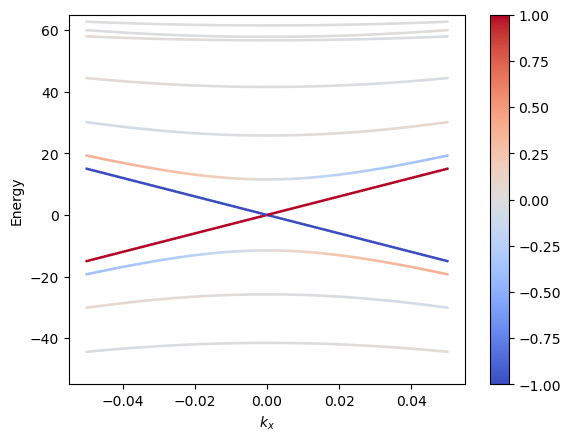

In [10]:
zcolors=[]
for k in range(len(momenta)):
    tem_1=[]
    for i in range(np.array(es).shape[1]):
            swf=np.reshape(np.abs(evs[k][:,i])**2,(-1,2)).sum(1)
            tem_c=swf.reshape(2,-1).sum(1)
            tem_1.append(tem_c[0]-tem_c[1])
    zcolors.append(tem_1)

    
#1
for i in range(np.array(es).shape[1]):
    plt.scatter(momenta,np.array(es)[:,i],s=1,c=np.array(zcolors)[:,i],cmap="coolwarm",vmin=-1.,vmax=1.)
plt.ylim(-55,65)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.colorbar();

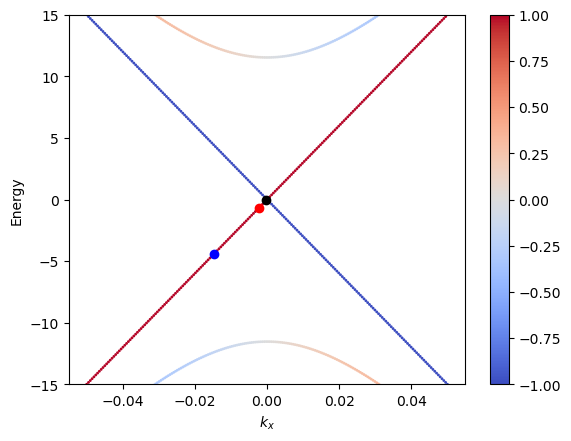

In [11]:
#1.1
for i in range(np.array(es).shape[1]):
    plt.scatter(momenta,np.array(es)[:,i],s=1,c=np.array(zcolors)[:,i],cmap="coolwarm",vmin=-1.,vmax=1.)
plt.plot(momenta[70], es[70][119], 'bo')
plt.plot(momenta[95], es[95][119], 'ro')
plt.plot(momenta[99], es[99][119], 'ko')
plt.ylim(-15,15)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.colorbar();

## R vs E

In [3]:
def find_voltages(tmatrix,current):
    try:
        voltage = np.linalg.solve(tmatrix[1:, 1:], current[1:])
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            print("Hi there, singular matrix here")
            voltage = [0,0,0,0,0,0,0,0,0,0,0]
        else:
            raise
    return [0, *voltage]

def resistance_xx(tmatrix):
    current = [1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 3)

def resistance_xy(tmatrix):
    current = [1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 12)

def rMplot(m_list, data, ptitle='resistance vs m'):
    rxx=[]
    rxy=[]
    for i in range(data.shape[0]):
        rxx.append(resistance_xx(data[i]))
        rxy.append(resistance_xy(data[i]))

    plt.plot(m_list,rxx,'-o', label='$R_{xx}$')
    plt.plot(m_list,rxy,'-o', label='$R_{xy}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()


# define a function to plot the resistance vs energy
# here, "data" is a "np.array", a list (different energy) of 6*6 transimission matrices=[]
def rEplot(energies, data, ptitle='resistance vs energy'):
    rxx=[]
    rxy=[]
    for i in range(data.shape[0]):
        rxx.append(resistance_xx(data[i]))
        rxy.append(resistance_xy(data[i]))

    plt.plot(energies,rxx,'-o', label='$R_{xx}$')
    plt.plot(energies,rxy,'-o', label='$R_{xy}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('Energy')
    plt.ylabel('Resistance')
    plt.legend()

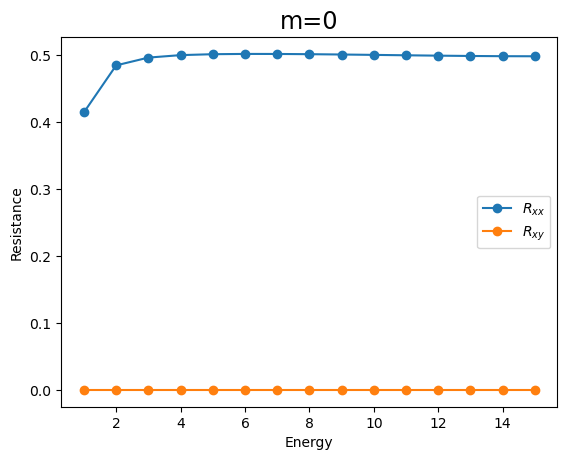

In [22]:
syst0=make_syst(width=60,length=660,leads_model=model_MTI())

data0=[]
e_range=np.linspace(1,15,num=15)
for energy in e_range:
    tmatrix = kwant.smatrix(syst0, energy,params=dict(m=0))
    data0.append(tmatrix.conductance_matrix())

rEplot(e_range,np.array(data0),"m=0")    

# 1m 15s

Hi there, singular matrix here
Hi there, singular matrix here


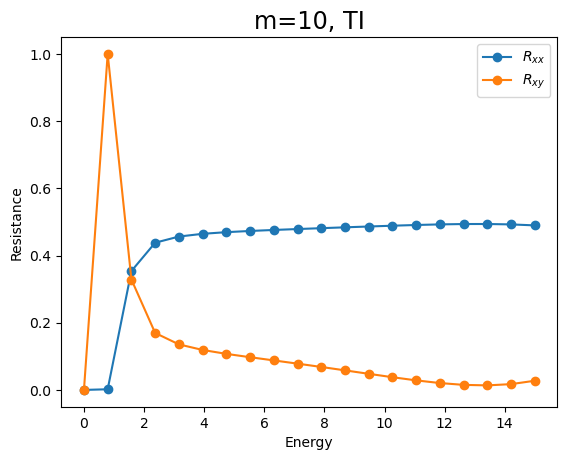

In [ ]:
syst_A=make_syst(width=60,length=660,leads_model=model_MTI())

data=[]
e_range=np.linspace(0,15,num=20)
for energy in e_range:
    tmatrix = kwant.smatrix(syst_A, energy,params=dict(m=10))
    data.append(tmatrix.conductance_matrix())

rEplot(e_range,np.array(data),"m=10")

#3m 7s

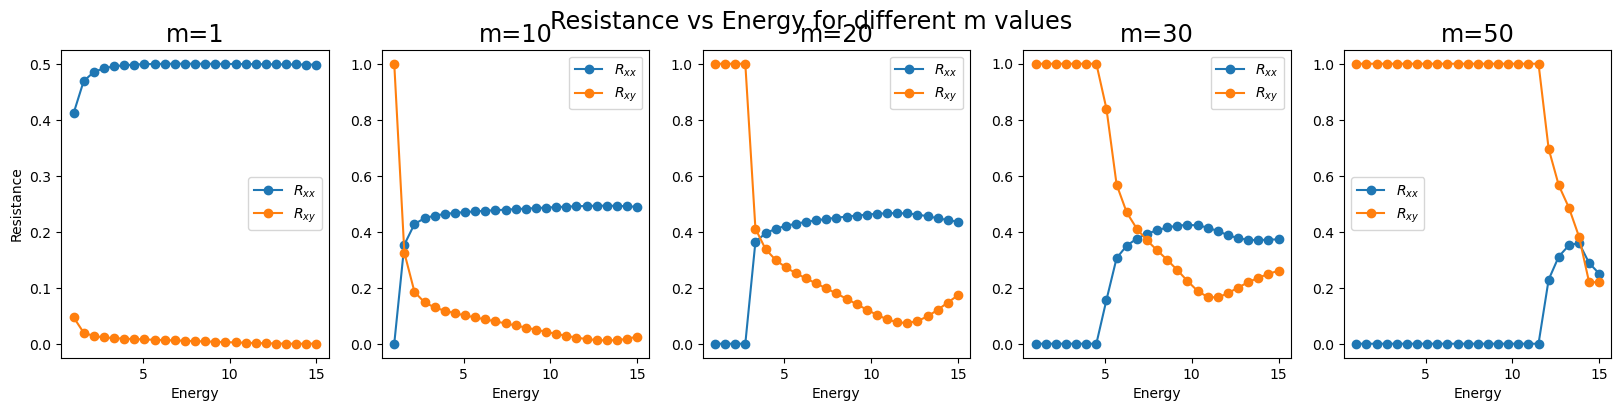

In [24]:
def rEplot_A(energies, data, ptitle='resistance vs energy', ax=None):
    if ax is None:  
        ax = plt.gca()
    
    rxx, rxy = [], []
    for i in range(data.shape[0]):
        rxx.append(resistance_xx(data[i]))
        rxy.append(resistance_xy(data[i]))
    
    
    ax.plot(energies, rxx, '-o', label='$R_{xx}$')
    ax.plot(energies, rxy, '-o', label='$R_{xy}$')
    
    
    ax.set_title(ptitle, size='xx-large')  
    ax.set_xlabel('Energy')                
    
    ax.legend()

syst_B=make_syst(width=60,length=660,leads_model=model_MTI())
e_range = np.linspace(1, 15, num=25)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Resistance vs Energy for different m values', size='xx-large')
x_limit = 15
ax1.set_ylabel('Resistance')

for ax in zip((ax1, ax2, ax3, ax4, ax5),(1,10,20,30,50)):
    
    
    ax[0].set_title(f'm={ax[1]}')
    
    data=[]
    for energy in e_range:
      tmatrix = kwant.smatrix(syst_B, energy,params=dict(m=ax[1]))
      data.append(tmatrix.conductance_matrix())
    
    rEplot_A(e_range, np.array(data),ax=ax[0],ptitle=f'm={ax[1]}') 



#15m 30s


## R vs m

In [25]:
systm=make_syst(width=60,length=660,leads_model=model_MTI())

datae=[]
m_range=np.linspace(-60,60,num=31)
for m_value in m_range:
    tmatrix = kwant.smatrix(systm, 10.0,params=dict(m=m_value))
    datae.append(tmatrix.conductance_matrix())

# around 2 minutes    

In [18]:
np.round(datae[1],2)

array([[ 1., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0.,  1., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0.,  1., -1., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0.,  1., -1., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0.,  1., -1., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0.,  1., -1., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.,  1., -1., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0.,  1., -1., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0.,  1., -1., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -0.,  1., -1., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1., -1.],
       [-1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1.]])

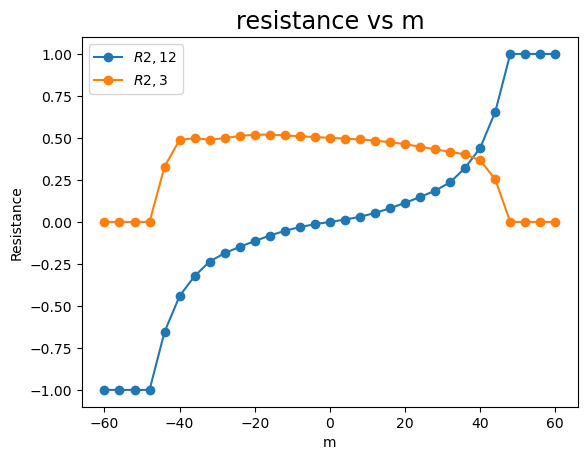

In [27]:
#任意端口
def rMplot_m(m_list, datae, lead1=2,lead2=5, ptitle='resistance vs m'):
    current = [1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
    rx=[]
    for i in range(datae.shape[0]):
        voltage = find_voltages(datae[i],current)
        rx.append(voltage[lead1-1]-voltage[lead2-1])

    plt.plot(m_list,rx,'-o', label=f'$R {lead1},{lead2}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()

rMplot_m(m_range,np.array(datae),2,12)
rMplot_m(m_range,np.array(datae),2,3)



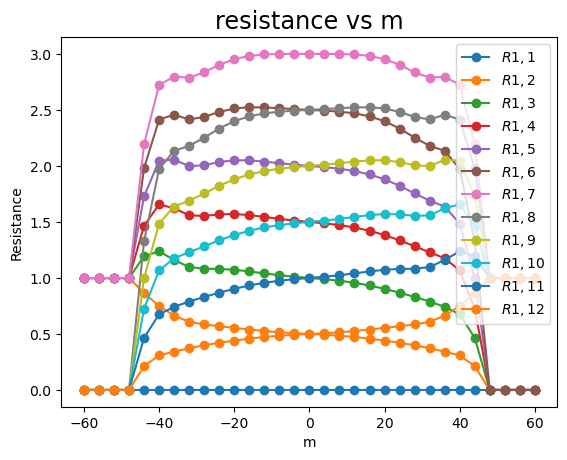

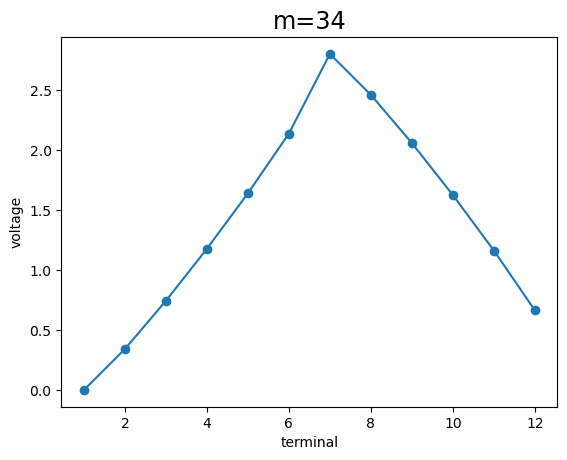

r_t (4 elements): [np.float64(0.4016448646515242), np.float64(0.43392697978888206), np.float64(0.4618495188435645), np.float64(0.4983735813438086)]
r_b (4 elements): [np.float64(0.49837358134397036), np.float64(0.4618495188435823), np.float64(0.4339269797888248), np.float64(0.40164486465146787)]


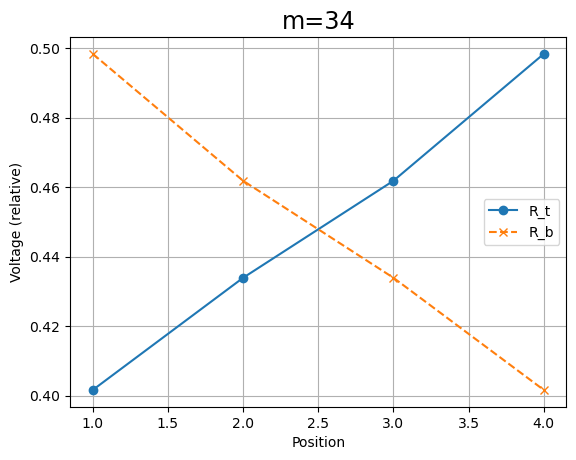

In [ ]:

r=[]
def rMplot_m(m_list, datae, lead1=2,lead2=5, ptitle='resistance vs m'):
    current = [1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
    rx=[]
    for i in range(datae.shape[0]):
        voltage = find_voltages(datae[i],current)
        rx.append(voltage[lead1-1]-voltage[lead2-1])
    r.append(rx[24])
    plt.plot(m_list,rx,'-o', label=f'$R {lead1},{lead2}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()
    
# double 3

rMplot_m(m_range,np.array(datae),1,1)
rMplot_m(m_range,np.array(datae),1,2)
rMplot_m(m_range,np.array(datae),1,3)
rMplot_m(m_range,np.array(datae),1,4)
rMplot_m(m_range,np.array(datae),1,5)
rMplot_m(m_range,np.array(datae),1,6)
rMplot_m(m_range,np.array(datae),1,7)
rMplot_m(m_range,np.array(datae),1,8)
rMplot_m(m_range,np.array(datae),1,9)
rMplot_m(m_range,np.array(datae),1,10)
rMplot_m(m_range,np.array(datae),1,11)
rMplot_m(m_range,np.array(datae),1,12)
plt.show()

#voltage vs n
np.round(r,2)

plt.plot(range(1,13),r,'-o', label='R')
plt.title("m=34", size='xx-large')
plt.xlabel('terminal')
plt.ylabel('voltage')
plt.show()


#3.计算顶部和底部的相邻端点电压差
r_t = []
for i in range(0, 4):
    r_t.append(r[i+2] - r[i+1])

r_b = [] 
for i in range(0, 4):
    r_b.append(r[10-i] - r[11-i]) 

print("r_t (4 elements):", r_t)
print("r_b (4 elements):", r_b)

x_values = range(1, 5)


plt.plot(x_values, r_t, '-o', label='R_t') # '-o' 表示实线和圆形标记
plt.plot(x_values, r_b, '--x', label='R_b') # '--x' 表示虚线和叉号标记


plt.title("m=34", size='xx-large')
plt.xlabel('Position')
plt.ylabel('Voltage (relative)')

plt.legend()
plt.grid(True)
plt.show()



## determine m and E

In [77]:
syst6=make_syst(width=60,length=660,leads_model=model_MTI())
E_value = 18
m_value = 30
tmatrix = kwant.smatrix(syst6,E_value,params=dict(m=m_value))
conductance_mat = tmatrix.conductance_matrix()

r=find_voltages(conductance_mat,[-1,0,0,0,0,0,1,0,0,0,0,0])


Text(0, 0.5, 'V/I')

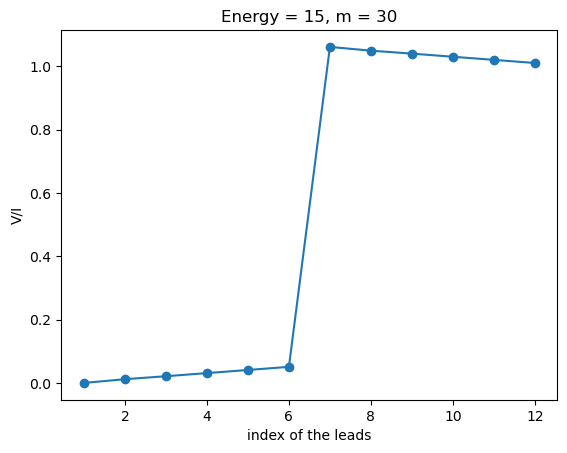

In [75]:
plt.plot(range(1,13), r, marker='o')
plt.title(f'Energy = {E_value}, m = {m_value}');
plt.xlabel('index of the leads')
plt.ylabel('V/I')

r_t (4 elements): [np.float64(0.0908282974754574), np.float64(0.0882338608360675), np.float64(0.08822457581844309), np.float64(0.08925641645535998)]
r_b (4 elements): [np.float64(0.08925641645534443), np.float64(0.08822457581843879), np.float64(0.08823386083607576), np.float64(0.09082829747545595)]


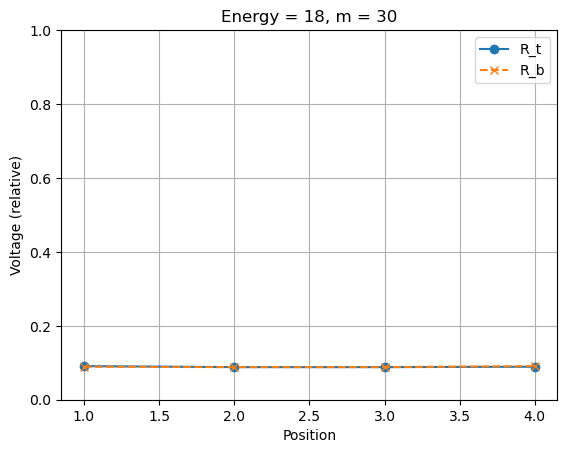

In [78]:
r_t = []
for i in range(0, 4):
    r_t.append(r[i+2] - r[i+1])

r_b = [] 
for i in range(0, 4):
    r_b.append(r[10-i] - r[11-i]) 

print("r_t (4 elements):", r_t)
print("r_b (4 elements):", r_b)

x_values = range(1, 5)


plt.plot(x_values, r_t, '-o', label='R_t') # '-o' 表示实线和圆形标记
plt.plot(x_values, r_b, '--x', label='R_b') # '--x' 表示虚线和叉号标记


plt.title(f'Energy = {E_value}, m = {m_value}')
plt.xlabel('Position')
plt.ylabel('Voltage (relative)')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()